In [1]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import torch.nn.init as nninit
import uuid

## Creating pixels with a neural net


In [2]:
class net(nn.Module):
    def __init__(self):
        super(net, self).__init__()
        self.ln1 = nn.Linear(z_size + 3,32,bias=False)  # set the input size according to z
        self.ln2 = nn.Linear(32,32,bias=False)
        self.ln3 = nn.Linear(32,32,bias=False)
        #self.ln4 = nn.Linear(32,1,bias=False)      # grey scale version
        self.ln4 = nn.Linear(32,3,bias=False)      # colour version
        nninit.uniform(self.ln1.weight, a=-1,b=1)
        nninit.uniform(self.ln2.weight,a=-1,b=1)
        nninit.uniform(self.ln3.weight,a=-1,b=1)
        nninit.uniform(self.ln4.weight,a=-1,b=1)
        self.tanh1 = nn.Tanh()
        self.tanh2 = nn.Tanh()
        self.tanh3 = nn.Tanh()
        self.sigmoid = nn.Sigmoid()
    def forward(self,x):
        U = self.ln1(x)
        U = self.tanh1(U)
        U = self.ln2(U)
        U = self.tanh2(U)
        U = self.ln3(U)
        U = self.tanh3(U)
        U = torch.sin(self.ln4(U))
        return self.sigmoid(U)


In [7]:
img_size = 128
scale = 0.1
z_size = 7  # min 7
num_images = 10
#model_dir = "model_dir"
model_dir = 'models/'

In [4]:
def createInputVec(z,x,y):
    r = math.sqrt(((x*scale-(img_size*scale/2))**2) + ((y*scale-(img_size*scale/2))**2) )
    z_size = len(z)
    input = torch.rand(1,z_size + 3)
    
    for i in range(z_size):
        input[0][i] = z[i] * scale
        
    input[0][z_size] = x * scale
    input[0][z_size+1] = y * scale
    input[0][z_size+2] = r
    input = Variable(input)
    return input

C:\Users\susbr\AppData\Local\Continuum\anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:9: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  if __name__ == '__main__':
C:\Users\susbr\AppData\Local\Continuum\anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:10: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\susbr\AppData\Local\Continuum\anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:11: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\susbr\AppData\Local\Continuum\anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:12: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  if sys.path[0] == '':


0


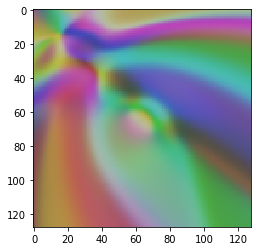

1


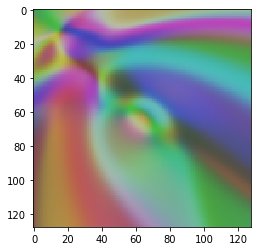

2


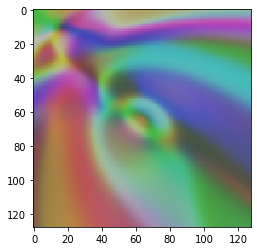

3


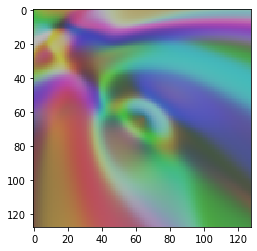

4


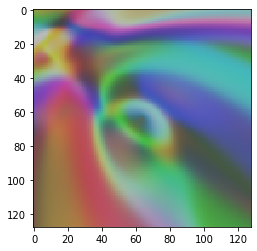

5


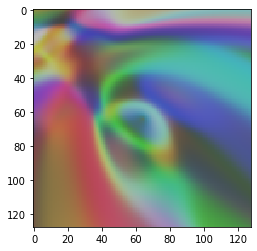

6


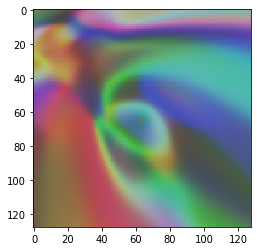

7


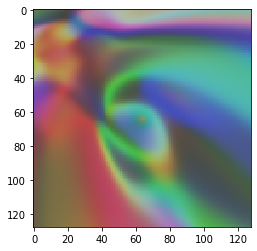

8


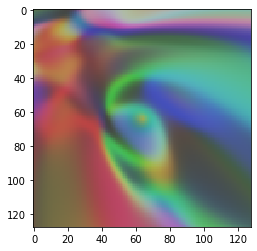

9


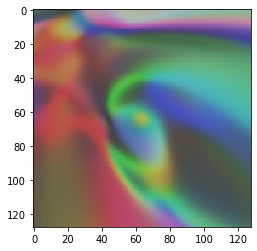

In [5]:
G = net()
#batch produce
z = torch.rand(z_size)
for i in range(num_images):
    print(i)
    z[0] = z[0] + 1
    z[1] = z[1] + 1
    z[2] = z[2] + 1
    z[3] = z[3] + 1
    z[4] = z[4] + 1
    z[5] = z[5] + 1
    z[6] = z[6] + 1
     
    #image = np.zeros((img_size ** 2, 1)) # gray scale version
    image = np.zeros((img_size ** 2, 3)) # colour version
    for i in range(img_size):
        
        for j in range(img_size):
            input = createInputVec(z,i,j)
            image[i*img_size + j] = G(input).data.numpy()

    #image = np.stack((image,image,image), axis=1)
    #image = image.reshape(img_size,img_size) # gray scale version

    image = image.reshape(img_size,img_size,3) # gray scale version
    imgplot = plt.imshow(image)#, cmap='gray')    # cmap was missing and displaying grayscale images as "coloured"
    plt.show()


In [8]:
## TODO: change the name to something uniqe for each new model

model_name = 'arts_model.pt'

# after training, save your model parameters in the dir 'saved_models'
torch.save(G.state_dict(), model_dir+model_name)

### Trying to understand the createInputVec() function


In [ ]:
def createInputVec(z,x,y):
    r = math.sqrt(((x*scale-(img_size*scale/2))**2) + ((y*scale-(img_size*scale/2))**2) )
    z_size = len(z)
    input = torch.rand(1,z_size + 3)   # this will be 
    
    for i in range(z_size):
        input[0][i] = z[i] * scale
        
    input[0][z_size] = x * scale
    input[0][z_size+1] = y * scale
    input[0][z_size+2] = r
    input = Variable(input)
    return input

In [42]:
x = img_size
y = img_size

In [84]:
z = torch.rand(z_size)
z_size = len(z)
z

tensor([0.3167, 0.8304, 0.0906, 0.6978, 0.6112, 0.3774, 0.1451, 0.0216])

In [58]:
r = math.sqrt(((x*scale-(img_size*scale/2))**2) + ((y*scale-(img_size*scale/2))**2) )
r

72.40773439350248

In [85]:
input_vector = torch.rand(1,z_size + 3)
input_vector.shape

torch.Size([1, 11])

## Alternative code for creating images by randomized weights ##

In [4]:
class NN(nn.Module):

    def __init__(self, activation=nn.Tanh, num_neurons=16, num_layers=9):
        """
        num_layers must be at least two
        """
        super(NN, self).__init__()
        layers = [nn.Linear(2, num_neurons, bias=True), activation()]
        for _ in range(num_layers - 1):
            layers += [nn.Linear(num_neurons, num_neurons, bias=False), activation()]
        layers += [nn.Linear(num_neurons, 3, bias=False), nn.Sigmoid()]
        self.layers = nn.Sequential(*layers)

    def forward(self, x):
        return self.layers(x)

In [27]:
def init_normal(m):
    if type(m) == nn.Linear:        
        nn.init.normal_(m.weight)

In [34]:
def gen_start_image(size_x, size_y, save=True, **kwargs):
    net = NN(**kwargs)
    net.apply(init_normal)
    image = run_net(net, size_x, size_y)
    
    return net, image


def run_net(net, size_x=128, size_y=128):
    x = np.arange(0, size_x, 1)
    y = np.arange(0, size_y, 1)
    colors = np.zeros((size_x, size_y, 2))
    for i in x:
        for j in y:
            colors[i][j] = np.array([float(i) / size_y - 0.5, float(j) / size_x - 0.5])
    colors = colors.reshape(size_x * size_y, 2)
    img = net(torch.tensor(colors).type(torch.FloatTensor)).detach().numpy()
    return img.reshape(size_x, size_y, 3)

In [31]:
def create_image(size_x=128, size_y=128):
    #net= NN(num_neurons=11, num_layers=2)
    net = NN()
    net.apply(init_normal)
    x = np.arange(0, size_x, 1)
    y = np.arange(0, size_y, 1)
    colors = np.zeros((size_x, size_y, 2))
    for i in x:
        for j in y:
            colors[i][j] = np.array([float(i) / size_y - 0.5, float(j) / size_x - 0.5])
    colors = colors.reshape(size_x * size_y, 2)
    img = net(torch.tensor(colors).type(torch.FloatTensor)).detach().numpy()
    return img.reshape(size_x, size_y, 3)

In [64]:
# Exploration of code and tensor sizes
size_x = 128
size_y = 256
x = np.arange(0, size_x, 1)
y = np.arange(0, size_y, 1)
colors = np.zeros((size_x, size_y, 2))
for i in x:
    for j in y:
        colors[i][j] = np.array([float(i) / size_y - 0.5, float(j) / size_x - 0.5])
print(colors.shape)
colors = colors.reshape(size_x * size_y, 2)
print(colors.shape)

(128, 256, 2)
(32768, 2)


(32768, 2)

In [21]:
def plot_image(image, fig_size=4):
    plt.figure(figsize=(fig_size, fig_size))
    plt.imshow(image, interpolation='nearest', vmin=0, vmax=1)

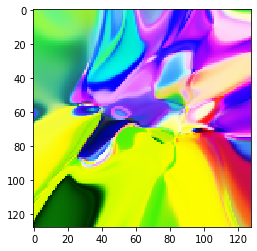

In [37]:
net, output = gen_start_image(size_x=128, size_y=128)
plot_image(output)